In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
data = fetch_20newsgroups()

In [5]:
#2
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [6]:
#3
categories_n = ['alt.atheism', 'comp.graphics', 'sci.space']
data = fetch_20newsgroups(subset='train', categories=categories_n)

In [17]:
#4
print("\t\t ПЕРВЫЙ ДОКУМЕНТ: \n",data.data[0])
print("\t\t ВТОРОЙ ДОКУМЕНТ: \n",data.data[1])
target = data.target
    

		 ПЕРВЫЙ ДОКУМЕНТ: 
 From: degroff@netcom.com (21012d)
Subject: Re: Venus Lander for Venus Conditions.
Organization: Netcom Online Communications Services (408-241-9760 login: guest)
Lines: 8


  I doubt there are good prospects for  a self armoring system
for venus surface conditions (several hundred degrees, very high
pressure of CO2, possibly sulfuric and nitric acids or oxides
but it is a notion to consider for outer planets rs where you might
pick up ices under less extream upper atmosphere conditions buying
deeper penetration.  A nice creative idea, unlikly but worthy of
thinking about.

		 ВТОРОЙ ДОКУМЕНТ: 
 From: ab@nova.cc.purdue.edu (Allen B)
Subject: Re: TIFF: philosophical significance of 42
Organization: Purdue University
Lines: 39

In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin  
Preston) writes:
> Why not use the PD C library for reading/writing TIFF files? It took me a
> good 20 minutes to start using them in your own app.

I certainly do us

In [13]:
#5
print(f"Количество классов: {len(data.target_names)}")
print(f"Уникальных записей: {len(set(data.data))}")

Количество классов: 3
Уникальных записей: 1657


In [19]:
#6
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
#7
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.data)
print("TF-IDF(Размерность): ",X.shape)

TF-IDF(Размерность):  (1657, 29663)


In [31]:
#8
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
#9
model.fit(data.data, target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [27]:
#10
test_data = [
    "In the discussion, the participants discuss the arguments for the existence of God.", 
    "Experts share the secrets of creating realistic 3D models on computers", 
    "In the discussion, astronomers discuss the latest discoveries in the study of planetary systems.", 
]
predicted_cl = model.predict(test_data)

for sentence, predicted_class in zip(test_data, predicted_cl):
    print("Предложение:", sentence)
    print("Предсказанный класс:", data.target_names[predicted_class])
    print()

Предложение: In the discussion, the participants discuss the arguments for the existence of God.
Предсказанный класс: alt.atheism

Предложение: Experts share the secrets of creating realistic 3D models on computers
Предсказанный класс: comp.graphics

Предложение: In the discussion, astronomers discuss the latest discoveries in the study of planetary systems.
Предсказанный класс: sci.space



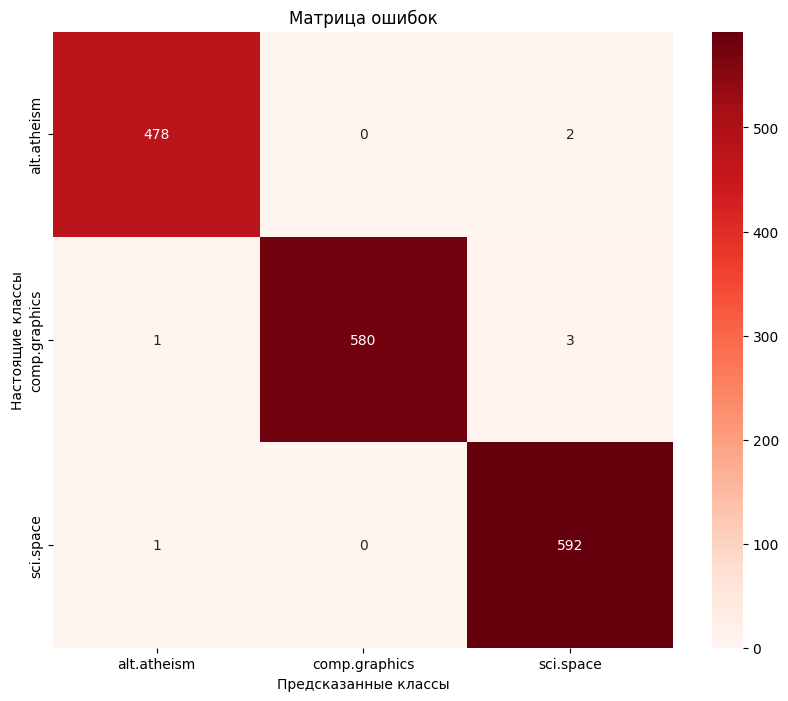

In [37]:
#11
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions_other = model.predict(data.data)

conf_mtrx = confusion_matrix(target, predictions_other)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_mtrx, annot=True, fmt="d", cmap="Reds", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Настоящие классы')
plt.title('Матрица ошибок')
plt.show()


In [32]:
#12
from sklearn.naive_bayes import ComplementNB, BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(data.data, target, test_size=0.2, random_state=0)

# Инициализация TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Преобразование с помощью метода TfidfVectorizer() и [fit_transform(), transform()]
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Список алгоритмов с различными параметрами которые были 
# предоставлены  в теорической части прктики под №5
algorithms = [
    ("MultinomialNB", MultinomialNB()),
    ("ComplementNB", ComplementNB()),
    ("BernoulliNB", BernoulliNB()),
    ("GaussianNB", GaussianNB())
]

# Обучение моделей и оценка их точности
for name, clasfr in algorithms:
    # Обучение модели
    clasfr.fit(X_train_tfidf.toarray(), y_train)

    # Предсказание на тестовом наборе данных
    y_pred = clasfr.predict(X_test_tfidf.toarray())

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность модели {name}: {accuracy}")


Точность модели MultinomialNB: 0.9728915662650602
Точность модели ComplementNB: 0.9849397590361446
Точность модели BernoulliNB: 0.9156626506024096
Точность модели GaussianNB: 0.9518072289156626
